In [23]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [24]:
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(10),     # Randomly rotate images by ±10 degrees
    transforms.ToTensor(),
    
])



In [25]:
train_dataset = datasets.ImageFolder(
    root="train",
    transform=train_transform
)

val_dataset = datasets.ImageFolder(
    root="test",
    transform=train_transform
)


In [26]:
batch_size = 4

In [27]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [28]:
import json

# Assuming 'train_dataset' has an attribute 'classes' that stores class labels
class_labels = train_dataset.classes
with open('class_labels.json', 'w') as f:
    json.dump(class_labels, f)


torch.Size([4, 3, 256, 256])


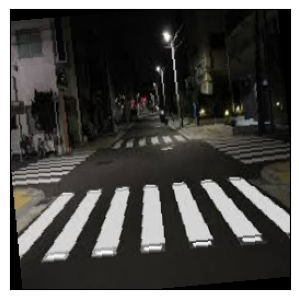

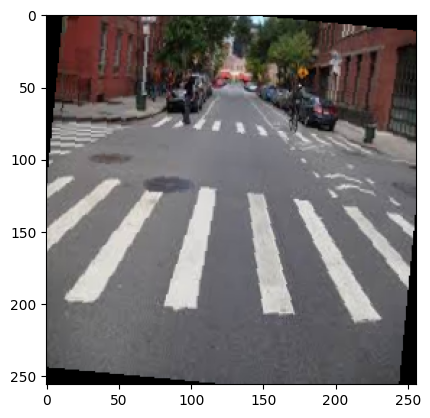

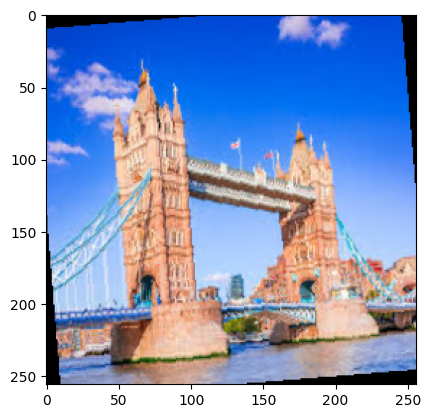

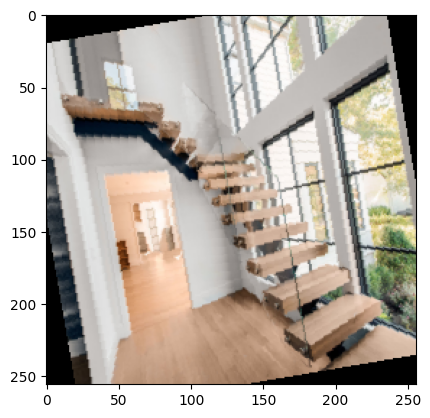

In [29]:
# Function to show images
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # convert from Tensor image
    plt.imshow(img)
    plt.show()

# Get a batch of training data
images, labels = next(iter(train_loader))
print(images.shape)
# Show images
fig = plt.figure(figsize=(8, 8))
for idx in range(batch_size):
    ax = fig.add_subplot(2, 2, idx + 1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(train_dataset.classes[labels[idx]])

In [30]:
num_classes = len(train_dataset.classes)
print(train_dataset.classes)  


['Bridge', 'Crosswalk', 'Stair']


In [31]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        
        # Update the linear layer to accommodate larger feature map size
        self.fc1 = nn.Linear(32 * 64 * 64, 128)  # Increased the output features of fc1 for potentially better learning
        self.fc2 = nn.Linear(128, num_classes)  # Output layer for two classes

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Activation after first convolution
        x = self.pool(x)           # First pooling reduces spatial dimensions
        x = F.relu(self.conv2(x))  # Activation after second convolution
        x = self.pool(x)           # Second pooling reduces dimensions further
        x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))    # First fully connected layer with activation
        x = self.fc2(x)            # Output layer
        return x


In [35]:
import torch.optim as optim

# Assuming SimpleCNN and train_loader are defined and properly initialized
model = SimpleCNN(num_classes=3)  # Be sure num_classes matches the number of your classes
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5



for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # Clear gradients for this training step
        outputs = model(images)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Perform a single optimization step (parameter update)

        running_loss += loss.item()  # Update running loss
        if i % 10 ==0:
            print(f'Epoch [{epoch+1}/{epochs}], Batch [{i+1}/{len(train_loader)}], Batch Loss: {loss.item():.4f}')  # Print loss for each batch

    epoch_loss = running_loss / len(train_loader)  # Calculate average loss for the epoch
    print(f'Epoch [{epoch+1}/{epochs}], Average Loss: {epoch_loss:.4f}')  # Print average loss after the epoch


Epoch [1/5], Batch [1/8], Batch Loss: 1.0799
Epoch [1/5], Average Loss: 3.3382
Epoch [2/5], Batch [1/8], Batch Loss: 0.7495
Epoch [2/5], Average Loss: 1.1677
Epoch [3/5], Batch [1/8], Batch Loss: 1.0695
Epoch [3/5], Average Loss: 1.0415
Epoch [4/5], Batch [1/8], Batch Loss: 0.9061
Epoch [4/5], Average Loss: 0.9345
Epoch [5/5], Batch [1/8], Batch Loss: 0.4510
Epoch [5/5], Average Loss: 0.7402


In [37]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Validation Accuracy: {accuracy:.2f}%')


Validation Accuracy: 60.00%


Save Model to model.pth file

In [38]:
torch.save(model.state_dict(), 'model.pth')


https://www.kaggle.com/code/abdmental01/muffins-or-chihuahua-the-ultimate-canine-show/input

I used the images from this source.